Obesity Risk Prediction

Steps followed in this Project
- Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Hyperparameter Tuning

# Obesity Risk Prediction:

The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease based on various features.

Features : id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC(Frequent Consumption of High Calorie Food),
FCVC(Frequency of consumption of vegetables), NCP(Number of main meals), CAEC(Consumption of food between meals),
SMOKE, CALC(Consumption of alcohol), SCC(Calories consumption monitoring), FAF(Physical activity frequency),
TUE(Time using technology devices), MTRANS(Transportation used)

Target Variable: NObeyesdad
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

Source: https://www.kaggle.com/competitions/playground-series-s4e2/overview

# 2. Data Collection

#### Importing required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

#### Importing the data

In [3]:
traindf = pd.read_csv('data/train.csv')
testdf = pd.read_csv('data/test.csv')

In [4]:
# Train Data Records
traindf.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Size/Shape of the Dataset
print("Train Data shape: ", traindf.shape)
print("Test Data shape: ", testdf.shape)

Train Data shape:  (20758, 18)
Test Data shape:  (13840, 17)


# 3. Perform Data checks

Understanding the Dataset by performing basic checks on the data.
- Check Missing Values
- Check Duplicates
- Check Data types
- Check Unique Values of each column
- Check description of numerical/categorical variables

#### Check Missing Values

In [6]:
# Train Data Missing Values
traindf.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
# Test Data Missing Values
testdf.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

No Null values is present in the Train and Test data.

#### Check Duplicate Values

In [8]:
print("Number of Duplicated Values in Train Dataset: ", traindf.duplicated().sum())
print("Number of Duplicated Values in Test Dataset: ", testdf.duplicated().sum())

Number of Duplicated Values in Train Dataset:  0
Number of Duplicated Values in Test Dataset:  0


No Duplicated Values in the Train and Test Dataset

#### Datatypes

In [9]:
# Train Data Info
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
# Test Data Info
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

#### Checking Unique Values

In [11]:
# Creating Target in Test Data
# testdf['NObeyesdad'] = np.nan

# Checking Unique Values
x = pd.DataFrame(traindf.nunique(), columns=['traindf'])
y = pd.DataFrame(testdf.nunique(), columns = ['testdf'])

pd.concat([x,y], axis=1)

,traindf,testdf
id,20758,13840.0
Gender,2,2.0
Age,1703,1539.0
Height,1833,1739.0
Weight,1979,1798.0
family_history_with_overweight,2,2.0
FAVC,2,2.0
FCVC,934,828.0
NCP,689,649.0
CAEC,4,4.0


#### Description of data

In [12]:
# Description of numerical columns

traindf.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- People are aged between 14 and 61
- People have weights between 39 to 165 with an average weight of 87 

In [13]:
testdf.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- The Age and weight column has same distribution as train data.

In [14]:
# Uniques values in Categorical Variables - Train Data

cat_variables_traindf = traindf.select_dtypes(include=['object']).columns.to_list()
cat_variables_testdf = testdf.select_dtypes(include=['object']).columns.to_list()

print("Train Data Columns: ")
for i in cat_variables_traindf:
    print("Unique values in",i,"-",traindf[i].unique())

print("Test Data Columns: ")
for i in cat_variables_testdf:
    print("Unique values in",i,"-",testdf[i].unique())

Train Data Columns: 
Unique values in Gender - ['Male' 'Female']
Unique values in family_history_with_overweight - ['yes' 'no']
Unique values in FAVC - ['yes' 'no']
Unique values in CAEC - ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in SMOKE - ['no' 'yes']
Unique values in SCC - ['no' 'yes']
Unique values in CALC - ['Sometimes' 'no' 'Frequently']
Unique values in MTRANS - ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values in NObeyesdad - ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']
Test Data Columns: 
Unique values in Gender - ['Male' 'Female']
Unique values in family_history_with_overweight - ['yes' 'no']
Unique values in FAVC - ['yes' 'no']
Unique values in CAEC - ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in SMOKE - ['no' 'yes']
Unique values in SCC - ['no' 'yes']
Unique values in CALC - ['Sometimes' 'no' 'Frequently' 'Always']
Unique va

- Unique values in Both train and test data is same. But CALC has <i>Always</i> value in Test data.

## 4. Exploratory Data Analysis

Analysing each feature and also variate analysis to check realtion with Target variable

##### Gender Column

In [15]:
traindf['Gender'].value_counts(), testdf['Gender'].value_counts()

(Gender
 Female    10422
 Male      10336
 Name: count, dtype: int64,
 Gender
 Female    6965
 Male      6875
 Name: count, dtype: int64)

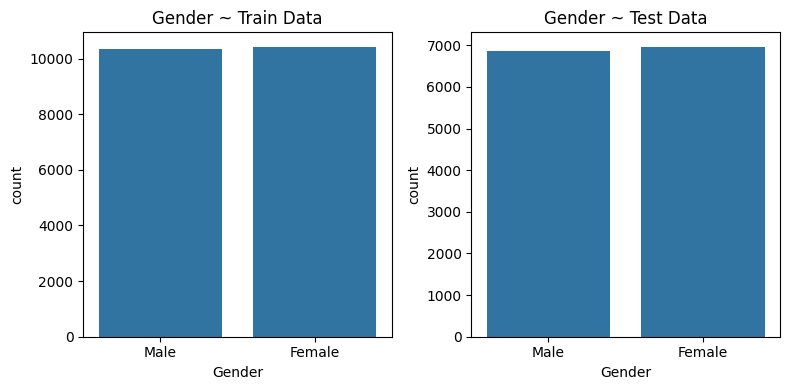

In [16]:
# Creating Bar Plots

fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.countplot(data = traindf, x = "Gender", ax = ax[0])
ax[0].set_title('Gender ~ Train Data')

sns.countplot(data = testdf, x="Gender", ax = ax[1])
ax[1].set_title('Gender ~ Test Data')

plt.tight_layout()

Text(0.5, 1.0, 'Gender ~ Test Data')

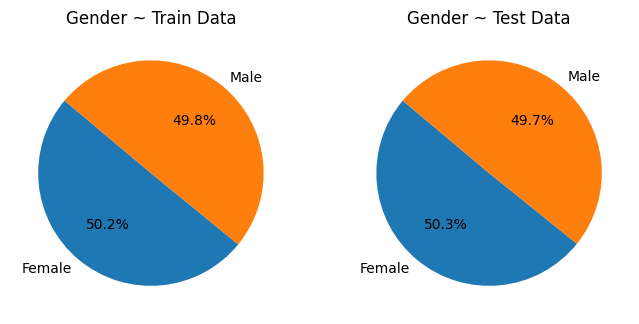

In [17]:
# Creating Pie Plots

fig, ax = plt.subplots(1,2, figsize=(8,4))

gender_counts_traindf = traindf['Gender'].value_counts()
gender_counts_testdf = testdf['Gender'].value_counts()

plt.subplot(1,2,1)
plt.pie(gender_counts_traindf, labels=gender_counts_traindf.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender ~ Train Data')

plt.subplot(1,2,2)
plt.pie(gender_counts_testdf, labels=gender_counts_testdf.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender ~ Test Data')


Females and Males are almost similar proportion in both train and test datasets.

##### Age Column

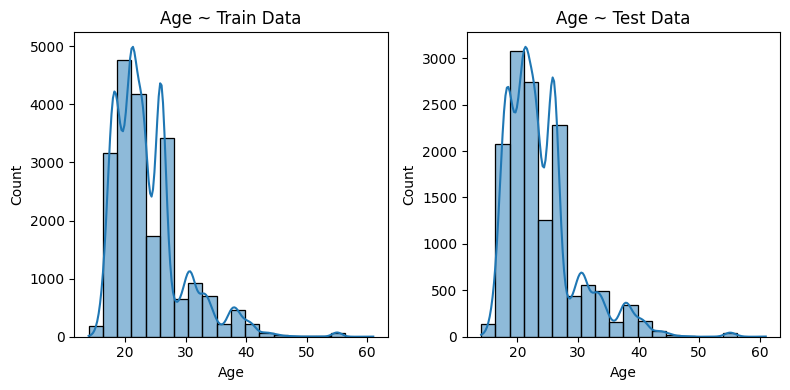

In [18]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))

sns.histplot(traindf, x='Age', bins=20, kde=True,ax = ax[0])
ax[0].set_title('Age ~ Train Data')

sns.histplot(testdf, x='Age', bins=20, kde=True, ax = ax[1])
ax[1].set_title('Age ~ Test Data')

plt.tight_layout()

Looks like the Age data is right skewed. This can be also represneted by the positive skewness value.

In [19]:
traindf['Age'].skew(), testdf['Age'].skew()

(1.5862517094133515, 1.5722378936315367)

#### Height Column

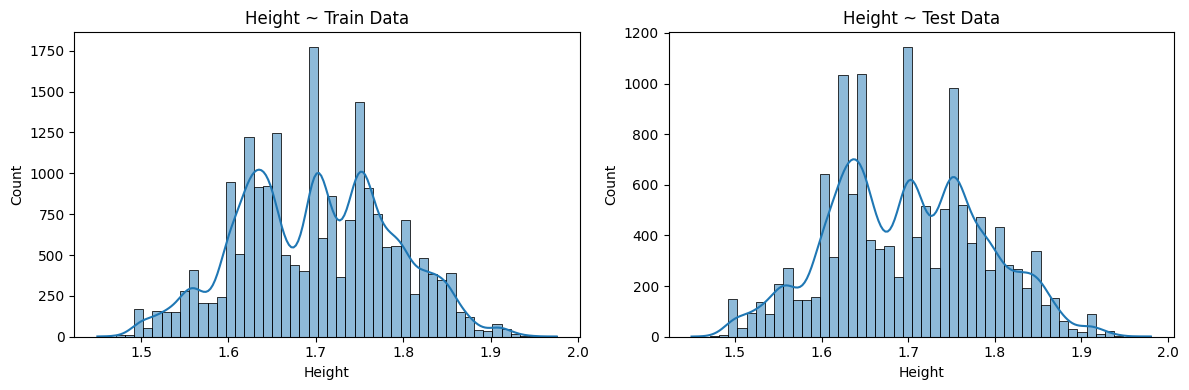

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

sns.histplot(traindf, x='Height', bins=50, kde=True,ax = ax[0])
ax[0].set_title('Height ~ Train Data')

sns.histplot(testdf, x='Height', bins=50, kde=True, ax = ax[1])
ax[1].set_title('Height ~ Test Data')

plt.tight_layout()

In [21]:
traindf['Height'].skew(), testdf['Height'].skew()

(0.01580267618775277, 0.06447176587895251)

The Height Column in both train and test data is normally distributed.

#### Weight Column

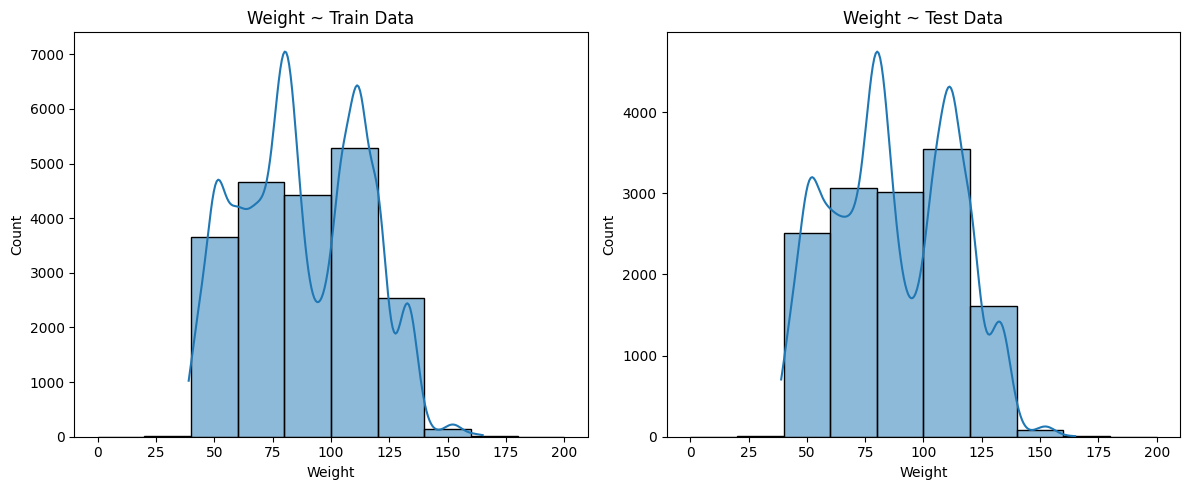

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.histplot(traindf, x='Weight', bins=[0,20,40,60,80,100,120,140,160,180,200], kde=True,ax = ax[0])
ax[0].set_title('Weight ~ Train Data')

sns.histplot(testdf, x='Weight', bins=[0,20,40,60,80,100,120,140,160,180,200], kde=True, ax = ax[1])
ax[1].set_title('Weight ~ Test Data')

plt.tight_layout()

In [23]:
traindf['Weight'].skew(), testdf['Weight'].skew()

(0.09318727954173465, 0.08660355243016586)

Weight Data has no skewness and seems to have more values to the left side of mean. Lets do some bivariate analysis on how weight is dependent on Target variable.

In [24]:
# Distribution of Train data

traindf.groupby(by ='NObeyesdad')['Weight'].agg(['min','max', 'mean', 'median'])


,min,max,mean,median
NObeyesdad,,,,
Insufficient_Weight,39.000000,113.714521,49.860773,50.000000
Normal_Weight,41.890204,90.000000,61.533289,60.000000
Obesity_Type_I,40.202773,155.872093,92.371026,90.116124
Obesity_Type_II,76.202761,137.767787,115.995914,118.332966
Obesity_Type_III,42.000000,165.057269,117.697452,111.914361
Overweight_Level_I,42.000000,96.679131,74.228266,75.000000
Overweight_Level_II,55.000000,115.000000,82.085513,81.627139


In [25]:
# Some records with weight < 45 of obesity levels

traindf[(traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])) & (traindf['Weight']<45)]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4160,4160,Female,20.803186,1.529834,40.202773,yes,yes,2.0,1.0,Sometimes,no,1.347559,no,0.127425,0.0,Sometimes,Public_Transportation,Obesity_Type_I
13312,13312,Female,19.000000,1.520000,42.000000,yes,yes,3.0,3.0,Frequently,no,1.000000,no,0.000000,0.0,Sometimes,Public_Transportation,Obesity_Type_III


#### Family History With Overweight Column

In [26]:
traindf['family_history_with_overweight'].value_counts(), testdf['family_history_with_overweight'].value_counts()

(family_history_with_overweight
 yes    17014
 no      3744
 Name: count, dtype: int64,
 family_history_with_overweight
 yes    11384
 no      2456
 Name: count, dtype: int64)

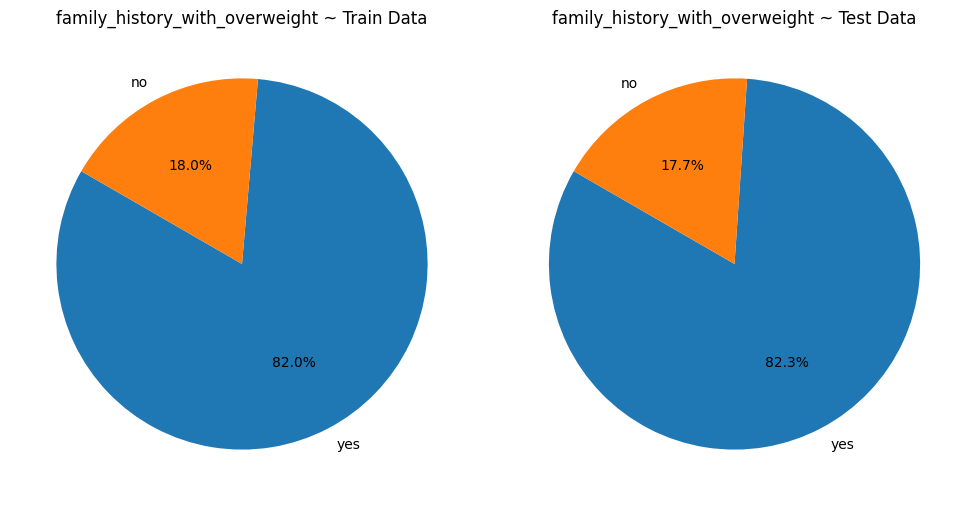

In [27]:
# Visualize the data

fhwo_traindf = traindf['family_history_with_overweight'].value_counts()
fhwo_testdf = testdf['family_history_with_overweight'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.pie(fhwo_traindf, labels=fhwo_traindf.index, autopct='%1.1f%%', startangle=150)
plt.title("family_history_with_overweight ~ Train Data")

plt.subplot(1,2,2)
plt.pie(fhwo_testdf, labels=fhwo_testdf.index, autopct='%1.1f%%', startangle=150)
plt.title("family_history_with_overweight ~ Test Data")

plt.tight_layout() # prevent overlaps


Let's check how family_history_with_overweight with Target variable.

<Axes: xlabel='NObeyesdad', ylabel='count'>

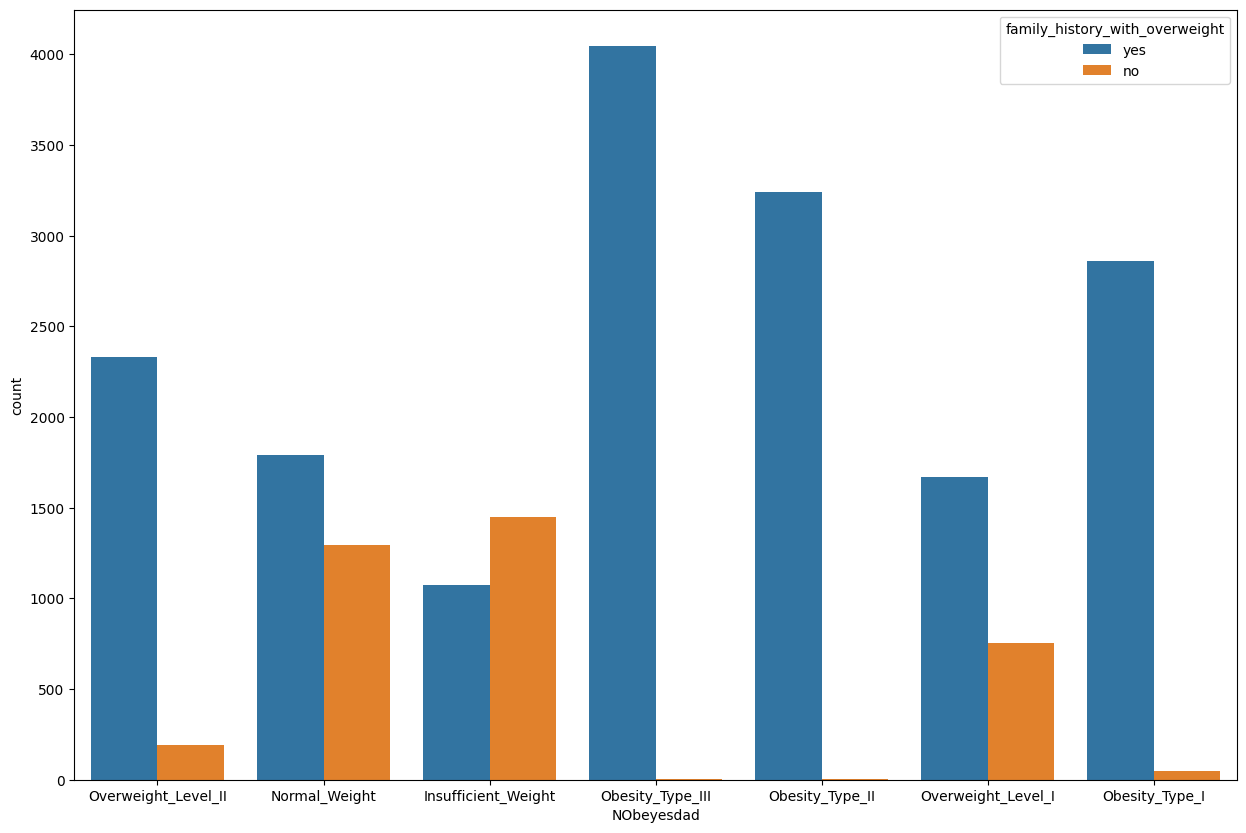

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data = traindf, x='NObeyesdad', hue='family_history_with_overweight')

From the data, it is clearly evident that if the family has history of overweight, they have obesity in some level.

#### FAVC Column - Frequent consumption of high caloric food (FAVC)

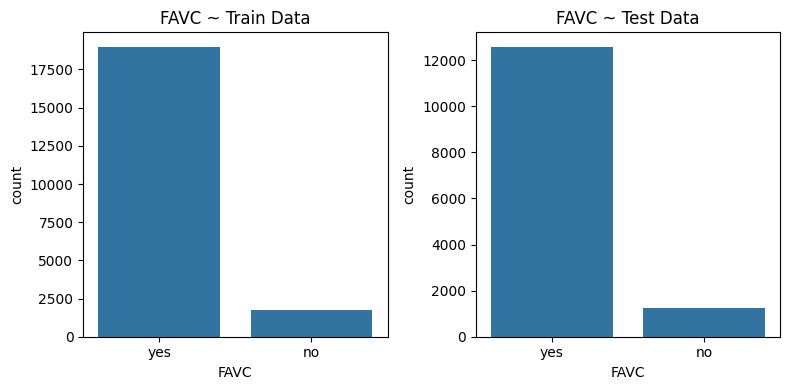

In [29]:
fig, ax = plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data = traindf, x='FAVC', ax=ax[0])
ax[0].set_title('FAVC ~ Train Data')

sns.countplot(data = testdf, x='FAVC', ax=ax[1])
ax[1].set_title('FAVC ~ Test Data')

plt.tight_layout()

<Axes: xlabel='NObeyesdad', ylabel='count'>

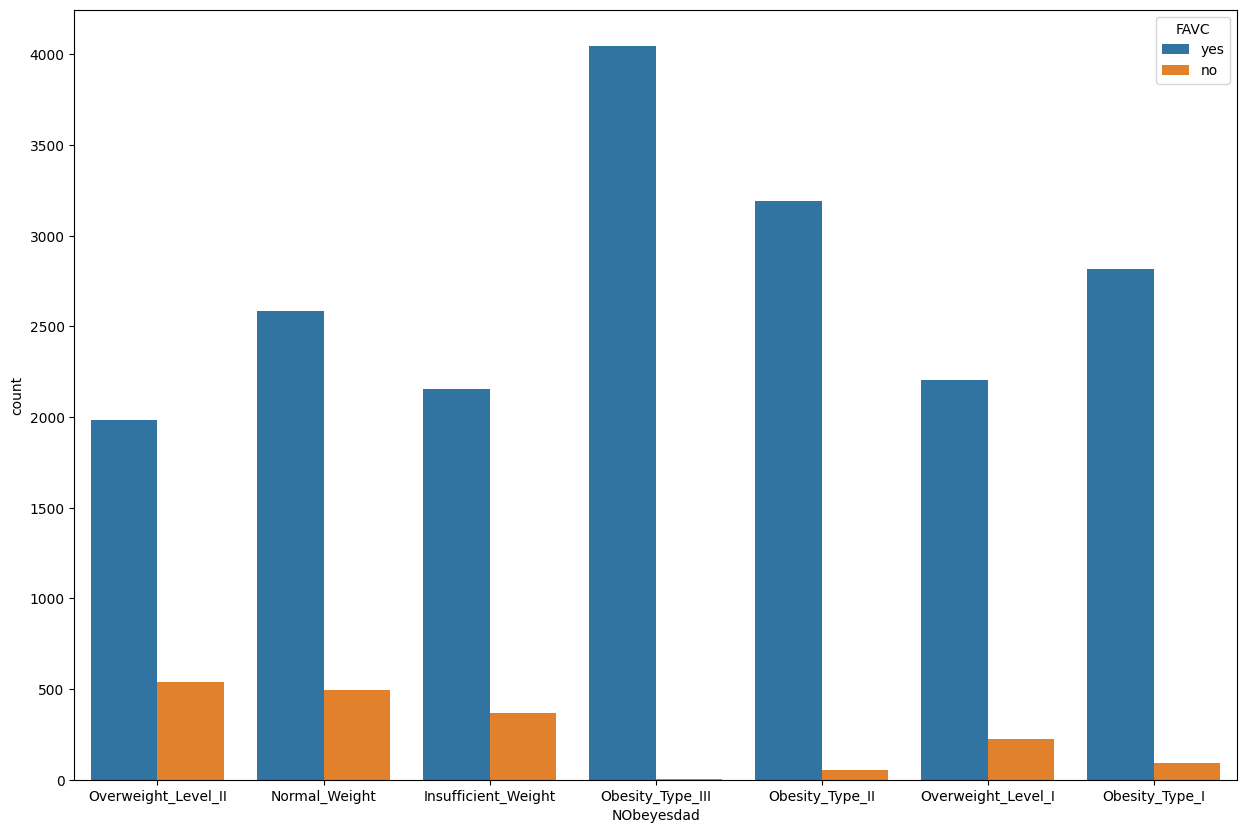

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data = traindf, x='NObeyesdad', hue='FAVC')

In [31]:
# Checking the Obesity Levels who consume High Caloric Food

traindf[(traindf['FAVC']=='yes') & traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III
12,12,Male,18.000000,1.811189,108.251044,yes,yes,2.000000,2.164839,Sometimes,no,2.530157,no,1.000000,0.553311,no,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20751,20751,Female,21.030909,1.605495,133.466763,yes,yes,3.000000,3.000000,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20752,20752,Female,40.000000,1.554728,77.561602,yes,yes,2.000000,3.000000,Sometimes,no,1.131169,no,0.281734,0.522259,Sometimes,Automobile,Obesity_Type_I
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


Insights:

- There are 10056 people with Some Obesity Level who consume High caloric Food.

#### FCVC Column - Frequency of consumption of vegetables (FCVC)

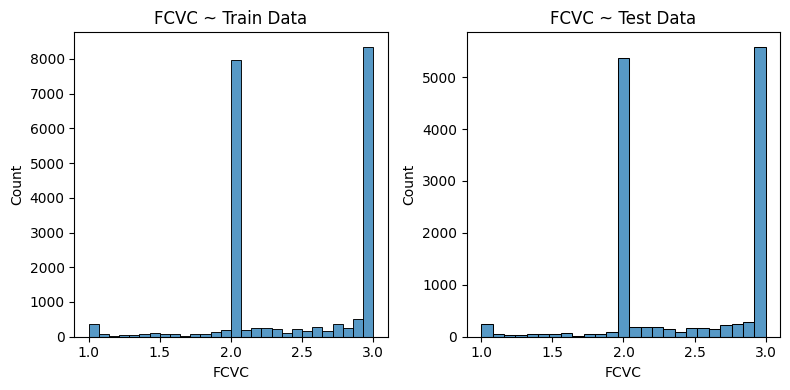

In [34]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data = traindf, x='FCVC', ax = ax[0])
ax[0].set_title('FCVC ~ Train Data')
sns.histplot(data = testdf, x='FCVC', ax = ax[1])
ax[1].set_title('FCVC ~ Test Data')

plt.tight_layout()

In [39]:
# Checking the Obesity Levels even if they consume Vegetables in their Diet

traindf[(traindf['FCVC']==3) & traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.0,3.0,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III
13,13,Female,21.412538,1.729045,131.529267,yes,yes,3.0,3.0,Sometimes,no,1.959531,no,1.425712,0.947884,Sometimes,Public_Transportation,Obesity_Type_III
22,22,Female,25.918524,1.663341,112.579220,yes,yes,3.0,3.0,Sometimes,no,2.724099,no,0.000000,0.081156,Sometimes,Public_Transportation,Obesity_Type_III
26,26,Female,26.000000,1.611462,111.950113,yes,yes,3.0,3.0,Sometimes,no,2.609052,no,0.000000,0.079334,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20737,20737,Female,25.783865,1.633020,104.988925,yes,yes,3.0,3.0,Sometimes,no,1.322004,no,0.246290,0.723154,Sometimes,Public_Transportation,Obesity_Type_III
20744,20744,Female,26.000000,1.637524,111.946655,yes,yes,3.0,3.0,Sometimes,no,2.396977,no,0.000000,0.037078,Sometimes,Public_Transportation,Obesity_Type_III
20749,20749,Female,25.783865,1.646390,104.835346,yes,yes,3.0,3.0,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20751,20751,Female,21.030909,1.605495,133.466763,yes,yes,3.0,3.0,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III


Insights:

- It's clearly evident that people who include Vegetables in their Diet more than 2 times a day has some level of Obesity.

#### NCP Column - Number of main meals (NCP)

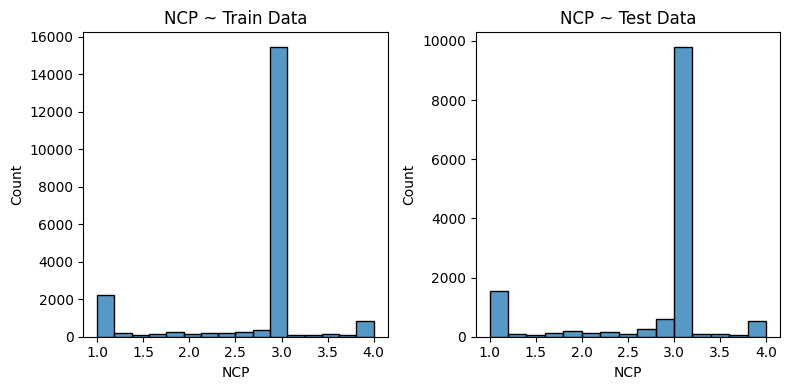

In [41]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data = traindf, x='NCP', ax = ax[0])
ax[0].set_title('NCP ~ Train Data')
sns.histplot(data = testdf, x = 'NCP', ax = ax[1])
ax[1].set_title('NCP ~ Test Data')

plt.tight_layout()

In [53]:
# People with Obesity Levels count

traindf[traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])].shape

(10204, 18)

In [52]:
traindf[(traindf['NCP']<3) & traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
12,12,Male,18.000000,1.811189,108.251044,yes,yes,2.000000,2.164839,Sometimes,no,2.530157,no,1.000000,0.553311,no,Public_Transportation,Obesity_Type_I
23,23,Female,29.740496,1.502609,77.929204,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
30,30,Male,23.118327,1.851123,119.841446,yes,yes,2.203962,2.954446,Sometimes,no,2.854161,no,1.191020,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
41,41,Male,21.000000,1.790000,105.000000,yes,yes,2.000000,1.703299,Sometimes,no,3.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
46,46,Male,30.686701,1.835271,120.998266,yes,yes,2.219186,2.937989,Sometimes,no,2.109697,no,1.628637,0.000000,no,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20710,20710,Male,33.749594,1.705813,102.134646,yes,yes,2.680375,2.976211,Sometimes,no,1.000000,no,1.191020,0.000000,no,Automobile,Obesity_Type_II
20720,20720,Male,18.000000,1.717432,108.897324,yes,yes,2.000000,1.255350,Sometimes,no,2.000000,no,0.000000,1.967259,Sometimes,Public_Transportation,Obesity_Type_I
20729,20729,Male,21.834894,1.722785,98.447311,yes,yes,2.000000,2.714115,Sometimes,no,2.374044,no,2.834373,2.000000,no,Public_Transportation,Obesity_Type_I
20734,20734,Male,24.417552,1.763582,117.384745,yes,yes,2.973569,2.993634,Sometimes,no,2.028368,no,1.390160,0.449886,Sometimes,Public_Transportation,Obesity_Type_II


Insights:

- Most People Consume 3 meals in a day
- People who consume less than 3 meals a day and having some level of obesity is 20% of obese people.

#### CAEC Column - Consumption of food between meals (CAEC)

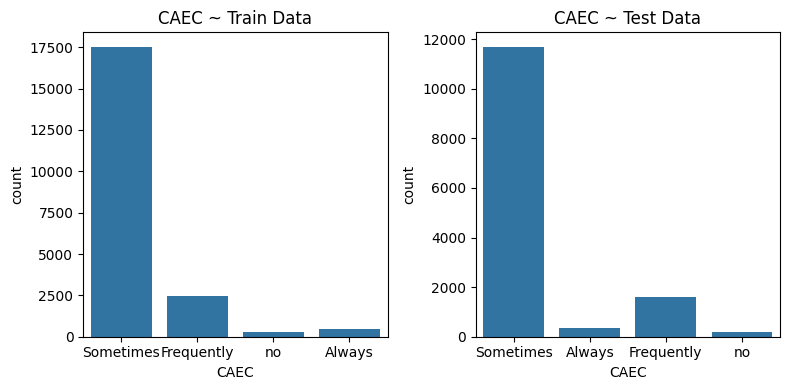

In [55]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.countplot(data = traindf, x='CAEC', ax =ax[0])
ax[0].set_title('CAEC ~ Train Data')

sns.countplot(data = testdf, x='CAEC', ax =ax[1])
ax[1].set_title('CAEC ~ Test Data')

plt.tight_layout()

In [62]:
# People with Obesity Levels count

traindf[traindf['NObeyesdad'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])].groupby(by = ['CAEC','NObeyesdad']).size()

CAEC        NObeyesdad      
Always      Obesity_Type_I        64
            Obesity_Type_II       10
            Obesity_Type_III       1
Frequently  Obesity_Type_I        56
            Obesity_Type_II       12
            Obesity_Type_III       3
Sometimes   Obesity_Type_I      2782
            Obesity_Type_II     3224
            Obesity_Type_III    4042
no          Obesity_Type_I         8
            Obesity_Type_II        2
dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

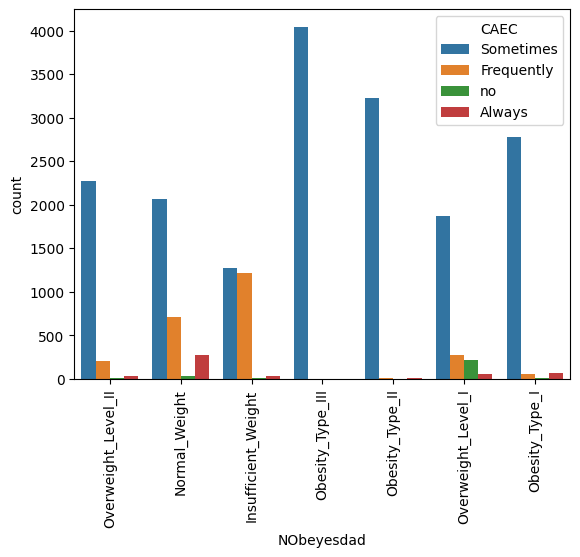

In [66]:
sns.countplot(x = 'NObeyesdad', data = traindf, hue='CAEC')
plt.xticks(rotation=90)

Insights:

- People with Normal and Insufficient Weights eat frequently. So, assumption is wrong about obese people eat frequently
- Most Obese eat some times between meals.|

#### SMOKE Column

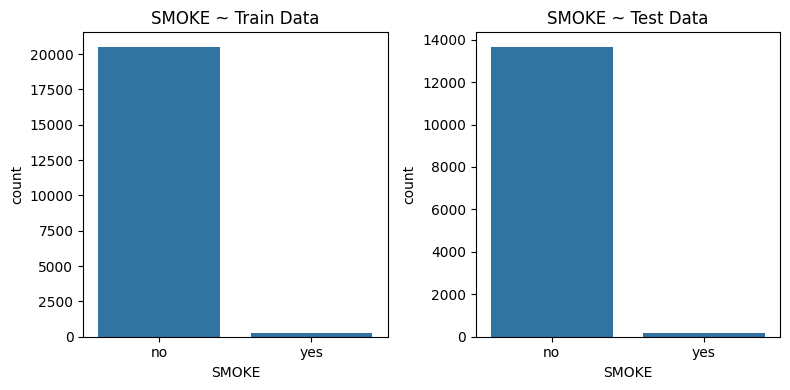

In [68]:
fig,ax = plt.subplots(1,2,figsize=(8, 4))
sns.countplot(data = traindf, x='SMOKE',ax=ax[0])
ax[0].set_title('SMOKE ~ Train Data')

sns.countplot(data = testdf, x='SMOKE',ax=ax[1])
ax[1].set_title('SMOKE ~ Test Data')

plt.tight_layout()

In [70]:
# Relationship of smoke across weights

traindf.groupby(by=['NObeyesdad','SMOKE']).size()

NObeyesdad           SMOKE
Insufficient_Weight  no       2516
                     yes         7
Normal_Weight        no       3036
                     yes        46
Obesity_Type_I       no       2886
                     yes        24
Obesity_Type_II      no       3134
                     yes       114
Obesity_Type_III     no       4042
                     yes         4
Overweight_Level_I   no       2402
                     yes        25
Overweight_Level_II  no       2497
                     yes        25
dtype: int64

<Axes: xlabel='NObeyesdad', ylabel='count'>

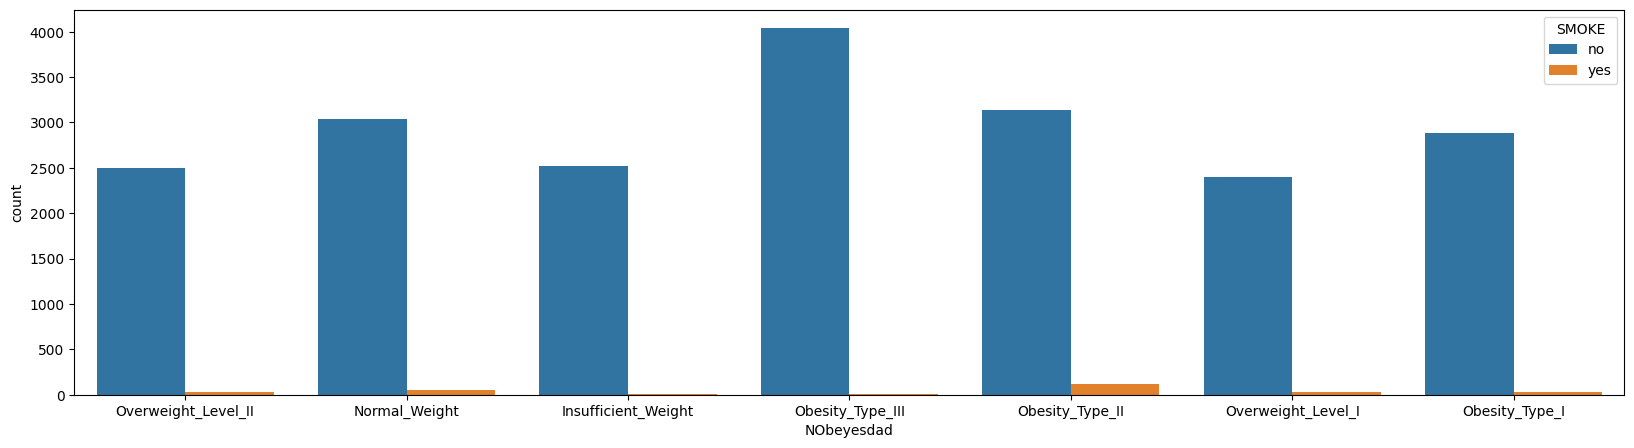

In [71]:
plt.figure(figsize=(20,5))
sns.countplot(data=traindf, x='NObeyesdad', hue='SMOKE')

Insights:

- Most People across different weights doesn't smoke at all. I think it has less dependency on target variable.

#### CALC Column - Consumption of alcohol (CALC)

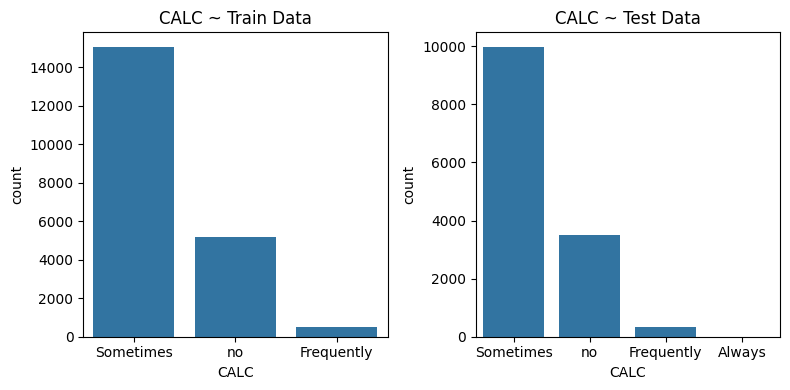

In [73]:
fig,ax = plt.subplots(1,2,figsize=(8, 4))
sns.countplot(data = traindf,x='CALC',ax=ax[0])
ax[0].set_title('CALC ~ Train Data')

sns.countplot(data = testdf,x ='CALC',ax=ax[1])
ax[1].set_title('CALC ~ Test Data')

plt.tight_layout()

In [74]:
# Relationship of smoke across weights

traindf.groupby(by=['NObeyesdad','CALC']).size()

NObeyesdad           CALC      
Insufficient_Weight  Frequently      14
                     Sometimes     1620
                     no             889
Normal_Weight        Frequently      68
                     Sometimes     1940
                     no            1074
Obesity_Type_I       Frequently      76
                     Sometimes     1444
                     no            1390
Obesity_Type_II      Frequently      13
                     Sometimes     2777
                     no             458
Obesity_Type_III     Sometimes     4046
Overweight_Level_I   Frequently     130
                     Sometimes     1960
                     no             337
Overweight_Level_II  Frequently     228
                     Sometimes     1279
                     no            1015
dtype: int64

<Axes: xlabel='NObeyesdad', ylabel='count'>

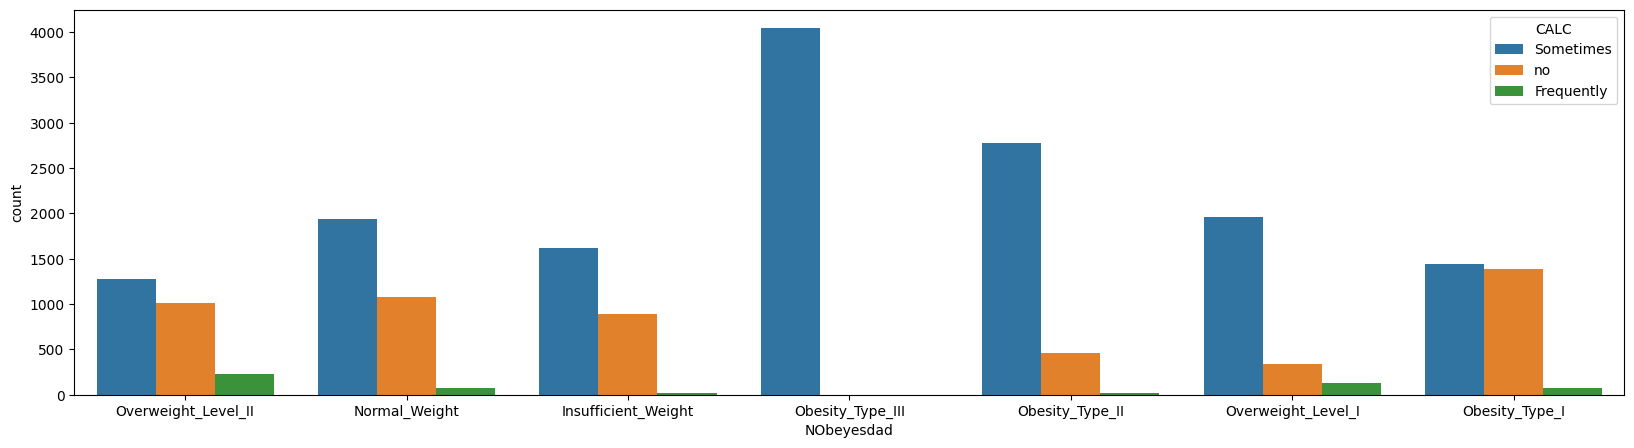

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(data=traindf, x='NObeyesdad', hue='CALC')

In [77]:
# Test Data Additional attribute value

testdf[testdf['CALC']=='Always']

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
4023,24781,Female,20.0,1.66,60.0,yes,yes,3.0,3.0,Always,no,2.0,no,0.0,0.0,Always,Public_Transportation
7443,28201,Male,21.0,1.67,66.5,no,yes,2.0,3.0,Frequently,no,2.0,no,1.0,0.0,Always,Public_Transportation


Insights:

- It is evident Obese people drinks sometimes.
- We can add Always attribute value in traindf with some value.

#### MTRANS Column

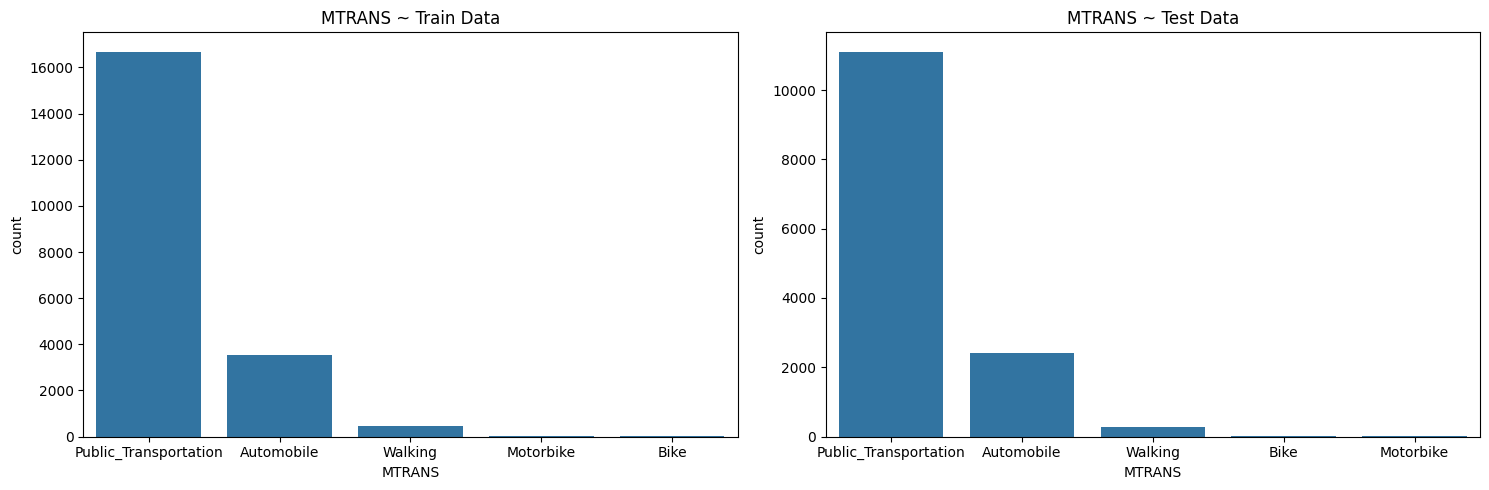

In [78]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data = traindf,x='MTRANS',ax=ax[0])
ax[0].set_title('MTRANS ~ Train Data')

sns.countplot(data = testdf,x='MTRANS',ax=ax[1])
ax[1].set_title('MTRANS ~ Test Data')

plt.tight_layout()

In [79]:
traindf[(traindf['MTRANS']=='Public_Transportation')].groupby(by='NObeyesdad').size()

NObeyesdad
Insufficient_Weight    2166
Normal_Weight          2565
Obesity_Type_I         2132
Obesity_Type_II        2294
Obesity_Type_III       4046
Overweight_Level_I     1835
Overweight_Level_II    1649
dtype: int64

Insights:

- Its look like everyone prefers Public Transportation.

### 4.1 Feature Engineering

Target Variable has BMI values between

- Insufficient_Weight : Less than 18.5
- Normal_Weight : 18.5 to 24.9
- Obesity_Type_I : 30.0 to 34.9
- Obesity_Type_II : 35.0 to 39.9
- Obesity_Type_III : Higher than 40
- Overweight_Level_I, Overweight_Level_II takes values between 25 to 29

In [82]:
# Creating BMI Feature

traindf['BMI'] = traindf['Weight']/traindf['Height']**2
testdf['BMI'] = testdf['Weight']/testdf['Height']**2

In [85]:
traindf.groupby(by='NObeyesdad')['BMI'].agg(['min','max','mean'])

,min,max,mean
NObeyesdad,,,
Insufficient_Weight,12.868541,36.778115,17.583619
Normal_Weight,14.631670,32.882414,22.000999
Obesity_Type_I,16.597443,46.805188,32.154649
Obesity_Type_II,24.048460,46.222483,36.521958
Obesity_Type_III,18.178670,54.997991,41.781745
Overweight_Level_I,15.761880,35.555556,26.059270
Overweight_Level_II,21.513859,36.741456,28.192491


- We can check the mean, it correctly replicates the above distribution.

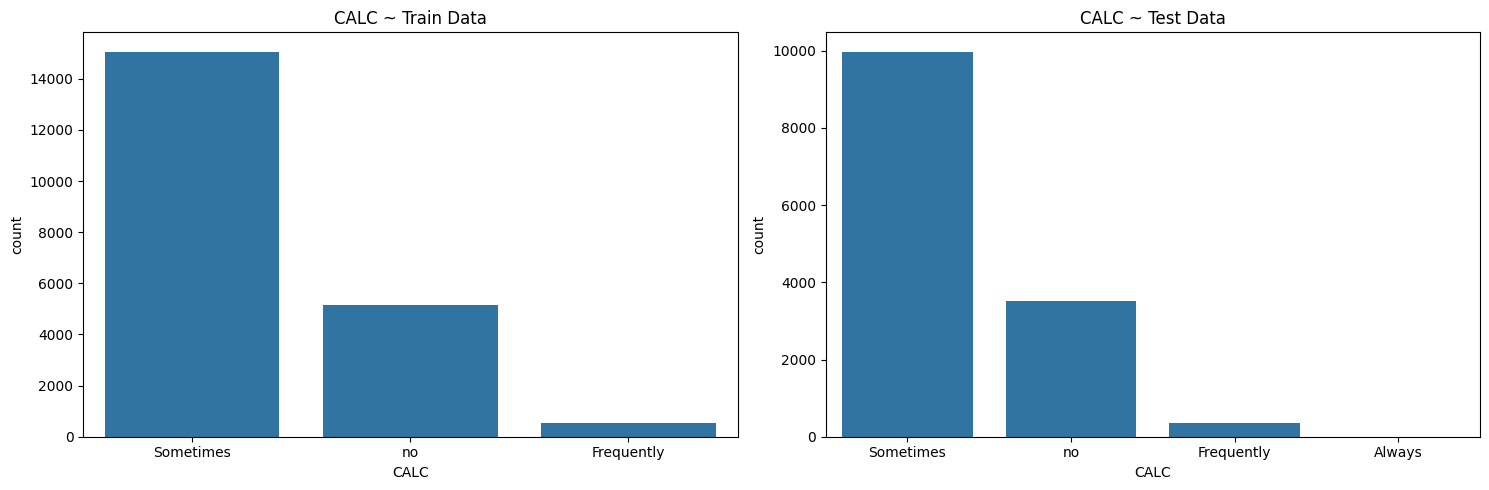

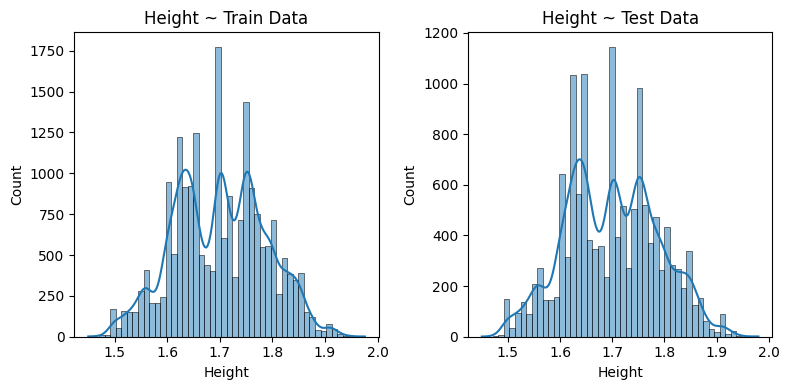

In [92]:
# Functions developed to avoid reusability of plotting code.

def plot_count(attr):
    fig,ax = plt.subplots(1,2,figsize=(15,5))

    sns.countplot(data = traindf,x=attr,ax=ax[0])
    axis_title = attr + ' ~ Train Data'
    ax[0].set_title(axis_title)
    
    sns.countplot(data = testdf,x=attr,ax=ax[1])
    axis_title = attr + ' ~ Test Data'
    ax[1].set_title(axis_title)
    
    plt.tight_layout()

def plot_hist(attr, bin_value):
    fig, ax = plt.subplots(1,2,figsize=(8, 4))

    sns.histplot(traindf, x=attr, bins=bin_value, kde=True,ax = ax[0])
    axis_title = attr + ' ~ Train Data'
    ax[0].set_title(axis_title)
    
    sns.histplot(testdf, x=attr, bins=bin_value, kde=True,ax = ax[1])
    axis_title = attr + ' ~ Test Data'
    ax[1].set_title(axis_title)
    
    plt.tight_layout()

plot_count('CALC')
plot_hist('Height', 50)